In [55]:
import json
import os.path
import sqlite3
from matplotlib import pyplot as plt

In [56]:
# TABLE prior_blurr_sensitivity_experiment(prior_val, std, img_index, start_time, end_time)

In [64]:
# best run
version = 5
# with 100 images in source folder
params_path = f'results/prior_blurr_sensitivity_experiment/custom_material_prior/version_{5}/params.json'

In [65]:
with open(params_path, 'r') as fp:
        params_dict = json.load(fp)
value_db_path = os.path.join(params_dict['result_dir'], 'values.db')

In [66]:
connection = sqlite3.connect(value_db_path)
cursor = connection.cursor()

In [67]:
#view for variance data
cursor.execute("DROP VIEW IF EXISTS variance_data")
cursor.execute("CREATE view IF NOT EXISTS variance_data as SELECT AVG(prior_val), MIN(prior_val), MAX(prior_val), std from prior_blurr_sensitivity_experiment group by std ")
connection.commit()

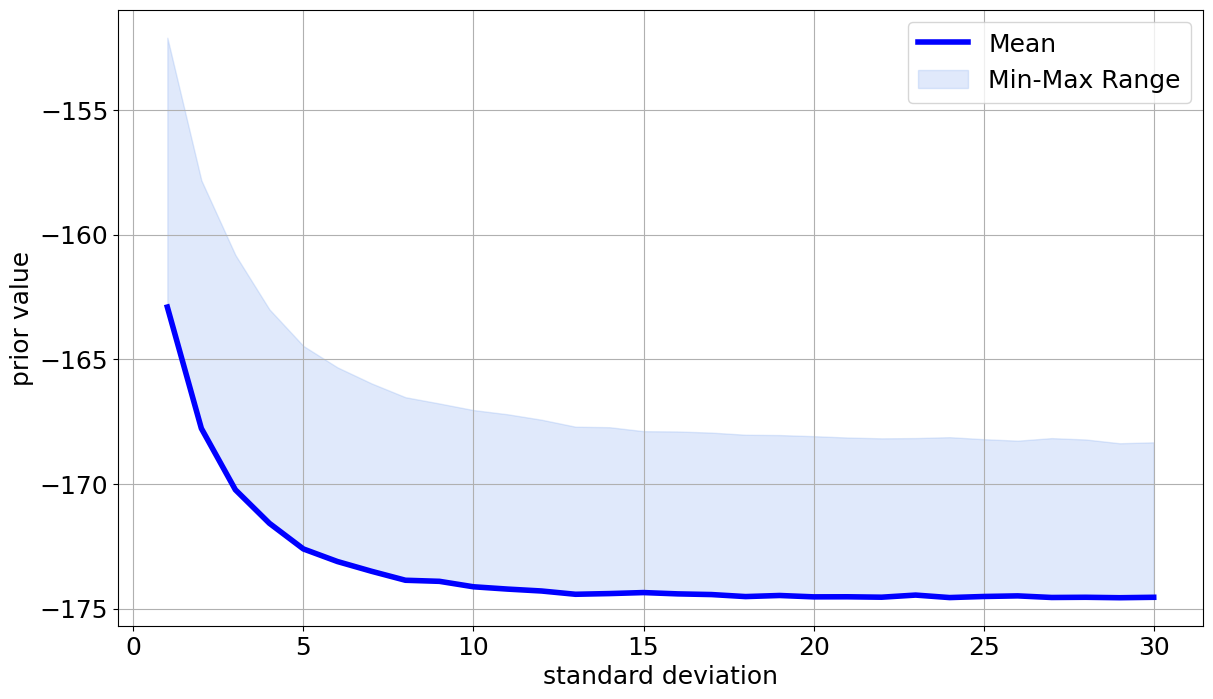

In [71]:
cursor.execute("SELECT * from variance_data")
means, mins, maxes, std = zip(*cursor.fetchall())
plt.rcParams.update({'font.size' : 18})
plt.figure(figsize=(14, 8))
plt.plot(std, mins, label='Mean', linestyle='-', linewidth=4, color='blue')
plt.fill_between(std, mins, maxes, color='cornflowerblue', alpha=0.2, label='Min-Max Range')
#plt.scatter(scatter_steps, scatter_values, color='cornflowerblue', marker='o', s=3, label='prior values')
plt.legend()
plt.xlabel('standard deviation')
plt.ylabel('prior value')
#plt.title('Prior behavior for blurr kernel with increasing std')
plt.grid(True)
plt.show()